[IPython Notebook](legacy_overcontact.ipynb) |  [Python Script](legacy_overcontact.py)

Comparing Contacts Binaries in PHOEBE 2.0 vs PHOEBE Legacy
============================

**NOTE**: PHOEBE 1.0 legacy is an alternate backend and is not installed with PHOEBE 2.0.  In order to run this backend, you'll need to have [PHOEBE 1.0](https://phoebe-project.org/1.0) installed.

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary(contact_binary=True)
#b['q'] = 0.7

/Library/Python/2.7/site-packages/astropy/units/quantity.py:782: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Adding Datasets and Compute Options
--------------------

In [3]:
b.add_dataset('lc', times=np.linspace(0,3,101), dataset='lc01')
b.add_dataset('rv', times=np.linspace(0,3,101), dataset='rv01')
#b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 11 parameters | kinds: rv, rv_dep>

Let's add compute options for phoebe using the new (marching) method for creating meshes.

In [4]:
b.add_compute('phoebe', compute='phoebe2', mesh_method='marching')

<ParameterSet: 34 parameters | datasets: lc01, rv01>

Now we add compute options for the 'legacy' backend.

In [5]:
b.add_compute('legacy', compute='phoebe1', morphology = 'Overcontact binary not in thermal contact')

<ParameterSet: 14 parameters | datasets: lc01, rv01>

The 'blackbody' atmospheres from phoebe1 are comperable to the 'extern_planckint' atmospheres in phoebe.

In [6]:
b.set_value_all('atm@phoebe2', 'extern_planckint')
b.set_value_all('atm@phoebe1', 'blackbody')

Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'
Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'
Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'
Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'
Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'
Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'
Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'


Set value of gridsize for the trapezoidal (WD) mesh.

In [7]:
b.set_value_all('gridsize', 30)

Let's also disable other special effect such as heating, gravity, and light-time effects.

In [8]:
b.set_value_all('ld_func', 'logarithmic')
    b.set_value_all('ld_coeffs', [0.0, 0.0])

    b.set_value_all('refl_num',0)
    b.set_value_all('rv_grav', False)
    b.set_value_all('ltte', False)

Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'
Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'
Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'
Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'
Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'
Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'
Thu, 01 Dec 2016 14:33 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'


Finally, let's compute our models

In [9]:
b.run_compute(compute='phoebe2', model='phoebe2model', reflection_method='none')

<ParameterSet: 6 parameters | kinds: rv, lc>

In [10]:
b.run_compute(compute='phoebe1', model='phoebe1model')

Thu, 01 Dec 2016 14:34 IO           WARNING frac_lost_bol has no phoebe 1 corollary
Thu, 01 Dec 2016 14:34 IO           WARNING ld_func_bol has no phoebe 1 corollary
Thu, 01 Dec 2016 14:34 IO           WARNING mass has no phoebe 1 corollary
Thu, 01 Dec 2016 14:34 IO           WARNING frac_lost_bol has no phoebe 1 corollary
Thu, 01 Dec 2016 14:34 IO           WARNING ld_func_bol has no phoebe 1 corollary
Thu, 01 Dec 2016 14:34 IO           WARNING mass has no phoebe 1 corollary
Thu, 01 Dec 2016 14:34 IO           WARNING pblum_ref has no phoebe 1 corollary
Thu, 01 Dec 2016 14:34 IO           WARNING intens_weighting has no phoebe 1 corollary
Thu, 01 Dec 2016 14:34 IO           WARNING lc_method has no phoebe 1 corollary
Thu, 01 Dec 2016 14:34 IO           WARNING pblum_ref has no phoebe 1 corollary
Thu, 01 Dec 2016 14:34 IO           WARNING fti_method has no phoebe 1 corollary
Thu, 01 Dec 2016 14:34 IO           WARNING exptime has no phoebe 1 corollary
Thu, 01 Dec 2016 14:34 IO       

primary
secondary


<ParameterSet: 6 parameters | kinds: rv, lc>

Plotting
-------------------------

### Light Curve

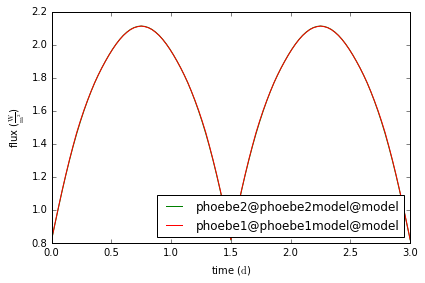

In [11]:
axs, artists = b['lc01@phoebe2model'].plot(color='g')
axs, artists = b['lc01@phoebe1model'].plot(color='r')
leg = plt.legend(loc=4)

Now let's plot the residuals between these two models

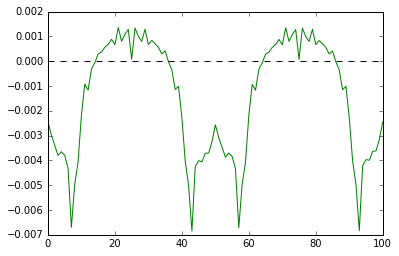

In [12]:
artist, = plt.plot(b.get_value('fluxes@lc01@phoebe2model') - b.get_value('fluxes@lc01@phoebe1model'), 'g-')
artist = plt.axhline(0.0, linestyle='dashed', color='k')

### RVs

Thu, 01 Dec 2016 14:38 PARAMETERS   WARNING attempting to plot but could not find parameter times - skipping
Thu, 01 Dec 2016 14:38 PARAMETERS   WARNING attempting to plot but could not find parameter times - skipping
Thu, 01 Dec 2016 14:39 PARAMETERS   WARNING attempting to plot but could not find parameter times - skipping
Thu, 01 Dec 2016 14:39 PARAMETERS   WARNING attempting to plot but could not find parameter times - skipping


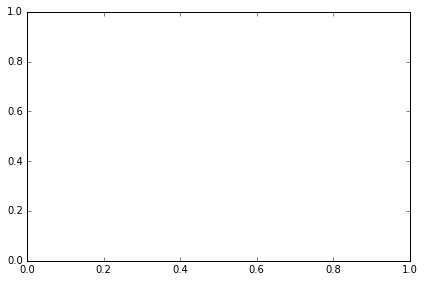

In [19]:
# TODO: Fix this part (plot can't find parameter times)
axs, artists = b['rvs@phoebe2model'].plot(color='g')
axs, artists = b['rvs@phoebe1model'].plot(color='r')

ParameterSet: 2 parameters
  times@primary@phoebe2@phoeb...: [ 0.    0.03  0.06 ...,  2.94
  2.97  3.  ] d
  rvs@primary@phoebe2@phoebe2...: [  6.88677459 -43.45133984
 -43.63920836 ...,  43.63527148
  43.46268828   6.88677856] km / s


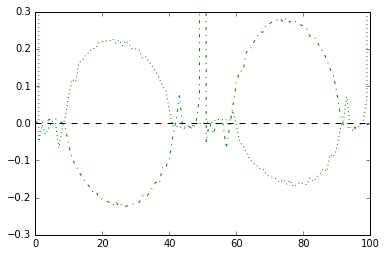

In [26]:
print b['primary@phoebe2model']
artist, = plt.plot(b.get_value('rvs@primary@phoebe2model', ) - b.get_value('rvs@primary@phoebe1model'), color='g', ls=':')
artist, = plt.plot(b.get_value('rvs@secondary@phoebe2model') - b.get_value('rvs@secondary@phoebe1model'), color='g', ls='-.')
artist = plt.axhline(0.0, linestyle='dashed', color='k')
ylim = plt.ylim(-0.3, 0.3)